
## **Data Science and Business Analytics GRIP MAY21**


### **Task 2: Prediction Using Unsupervised ML: K-Means CLustering**

Problem: From the ‘Iris’ dataset, predict the optimum number of clusters and represent them visually

### Author: Kritika Misra

In [19]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# loading the iris dataset

import os
os.chdir("C:/Users/Kritika/Downloads/")
df = pd.read_csv("Iris.csv")
df

#iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
#iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## **Comprehending the data**

In [20]:
df.shape

(150, 6)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## **How many flowers of each species?**

In [24]:
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

#### Given that there's equal number of data points in each species, we're working with a balanced dataset

#### 

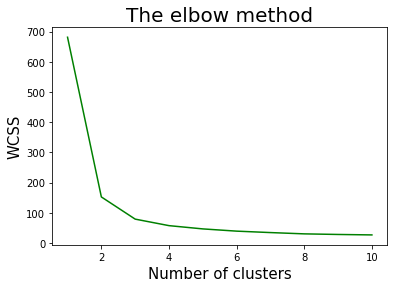

In [26]:
# Finding the optimum number of clusters for k-means classification

# Select all the four features (SepalLengthCm , SepalWidthCm , PetalLengthCm , PetalWidthCm) in variable x to train the
# model with 

x = iris_df.iloc[:, [0, 1, 2, 3]].values 

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph to observe the 'elbow'

plt.plot(range(1, 11), wcss, color="green")
plt.title('The elbow method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15) # Within cluster sum of squares
plt.show()

The optimum number of clusters is where the elbow occurs, i.e where the WCSS doesn't decrease significantly with every iteration. 
So we can choose the number of clusters as 3.

In [27]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

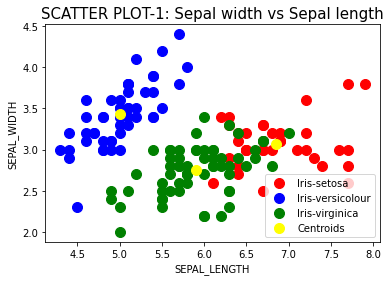

In [35]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('SCATTER PLOT-1: Sepal width vs Sepal length',fontsize=15)
plt.xlabel('SEPAL_LENGTH',fontsize=10)
plt.ylabel('SEPAL_WIDTH',fontsize=10)

plt.legend()

.

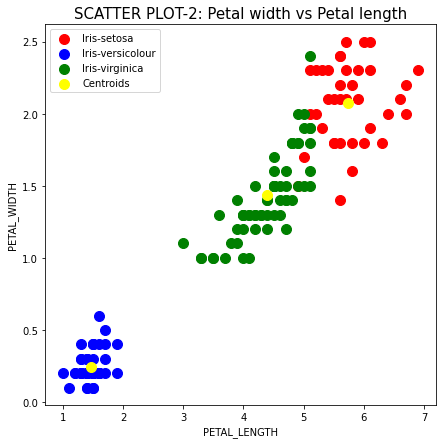

In [34]:
fig = plt.figure(figsize = (7,7))

plt.scatter(x[y_kmeans == 0, 2],x[y_kmeans == 0, 3], s =100,c='red', label = 'Iris-setosa',)
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s =100,c= 'blue', label = 'Iris-versicolour',)
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s =100,c='green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.title('SCATTER PLOT-2: Petal width vs Petal length',fontsize=15)
plt.xlabel('PETAL_LENGTH',fontsize=10)
plt.ylabel('PETAL_WIDTH',fontsize=10) 
plt.legend()

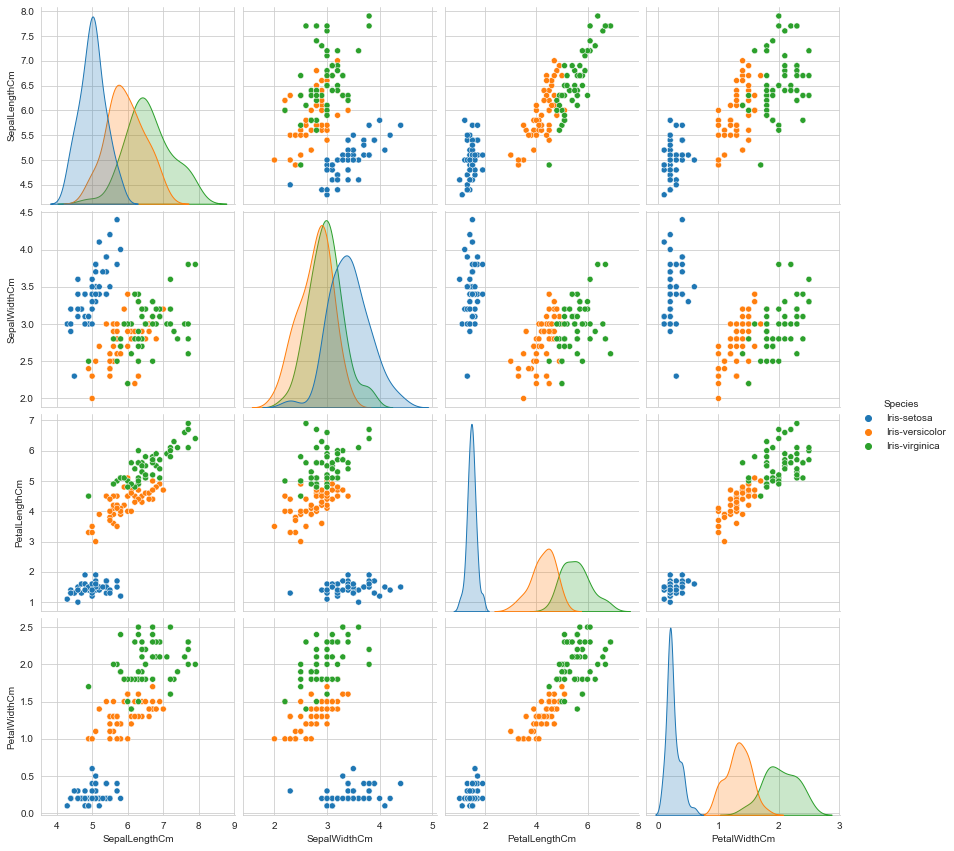

In [36]:
import seaborn as sns

df1=df.drop(["Id"],axis=1)
sns.set_style("whitegrid")
sns.pairplot(df1,hue="Species",height=3);
plt.show()

<IPython.core.display.Javascript object>


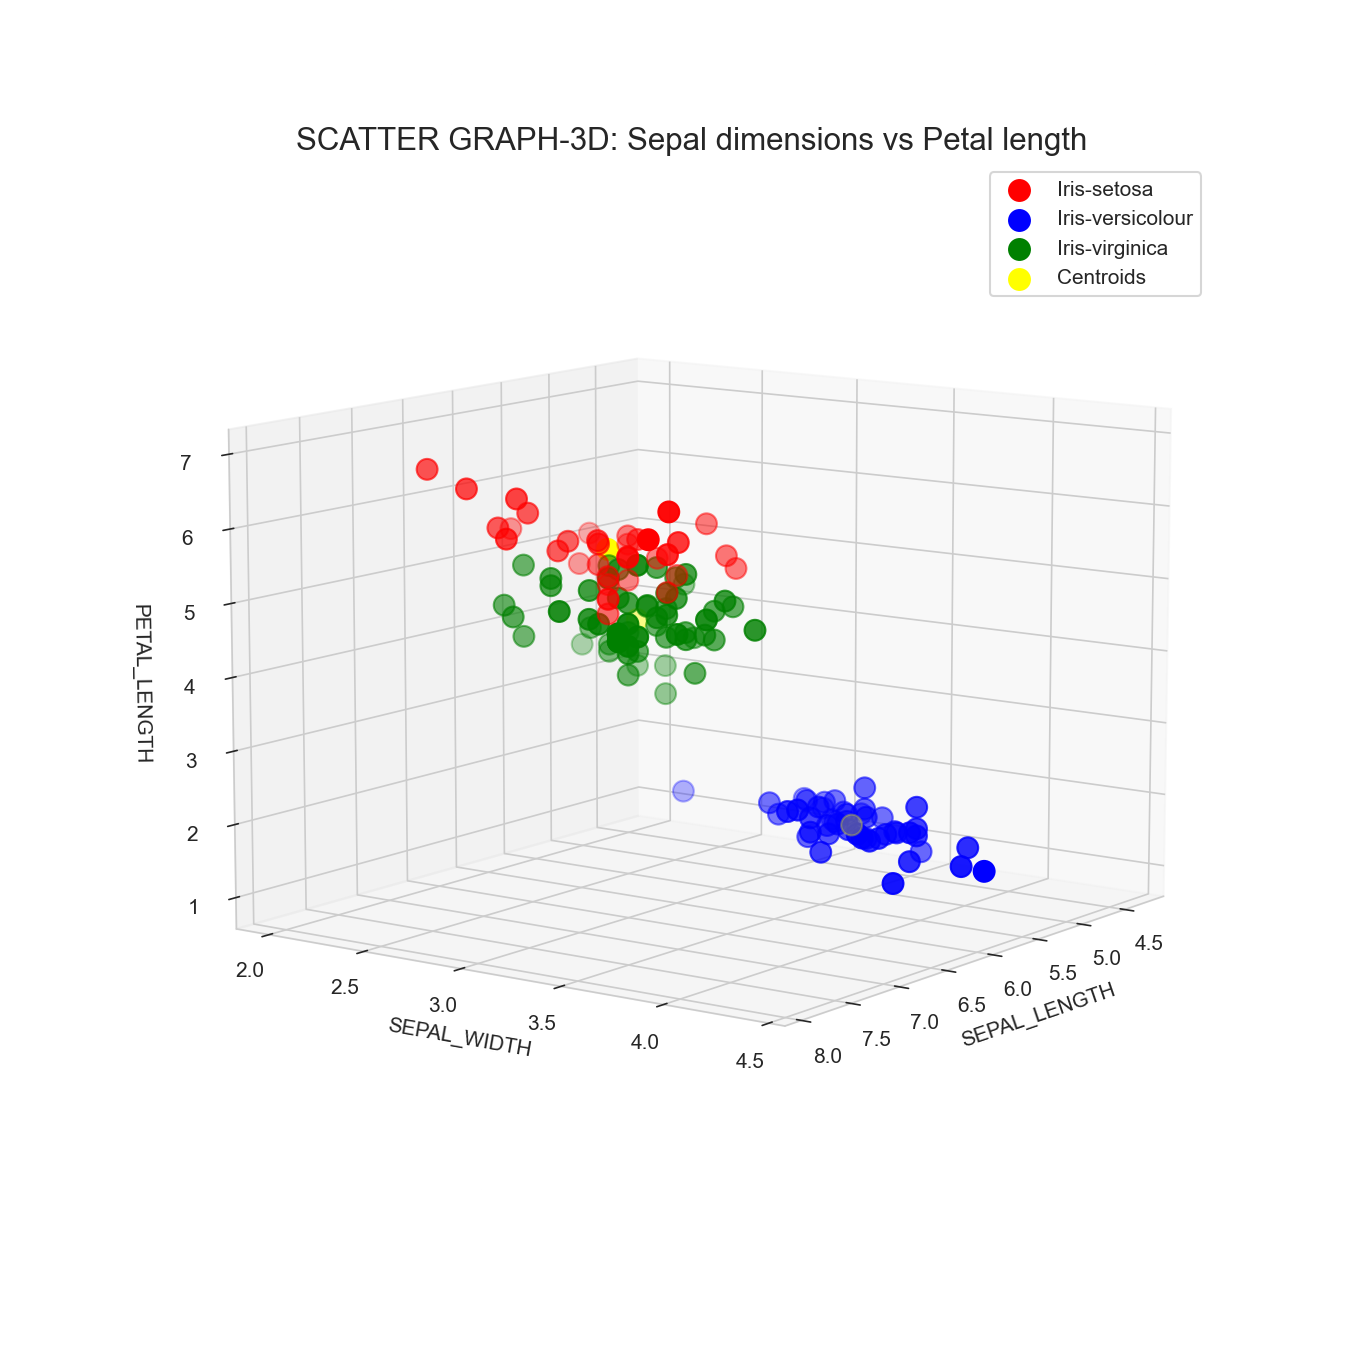

In [38]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s =100,c='red', label = 'Iris-setosa')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s =100,c= 'blue', label = 'Iris-versicolour')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s =100,c='green', label = 'Iris-virginica')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')


ax.set_title('SCATTER GRAPH-3D: Sepal dimensions vs Petal length',fontsize=15)
ax.set_xlabel('SEPAL_LENGTH',fontsize=10)
ax.set_ylabel('SEPAL_WIDTH',fontsize=10)
ax.set_zlabel('PETAL_LENGTH',fontsize=10) 
plt.legend()